In [6]:
import pandas as pd

with open('Test-1-Same-Speed.csv', 'r') as f:
    lines = f.read().splitlines()

data = []

for line in lines[1:]:  # Skip the first line
    fields = line.split(',')
    carId = fields[0]
    rsuId = fields[1]
    messageCount = int(fields[2])
    timestamps = list(map(int, fields[3:]))
    data.append([carId, rsuId, messageCount, timestamps])

df = pd.DataFrame(data, columns=['CarId', 'RSUId', 'MessageCount', 'Timestamps'])

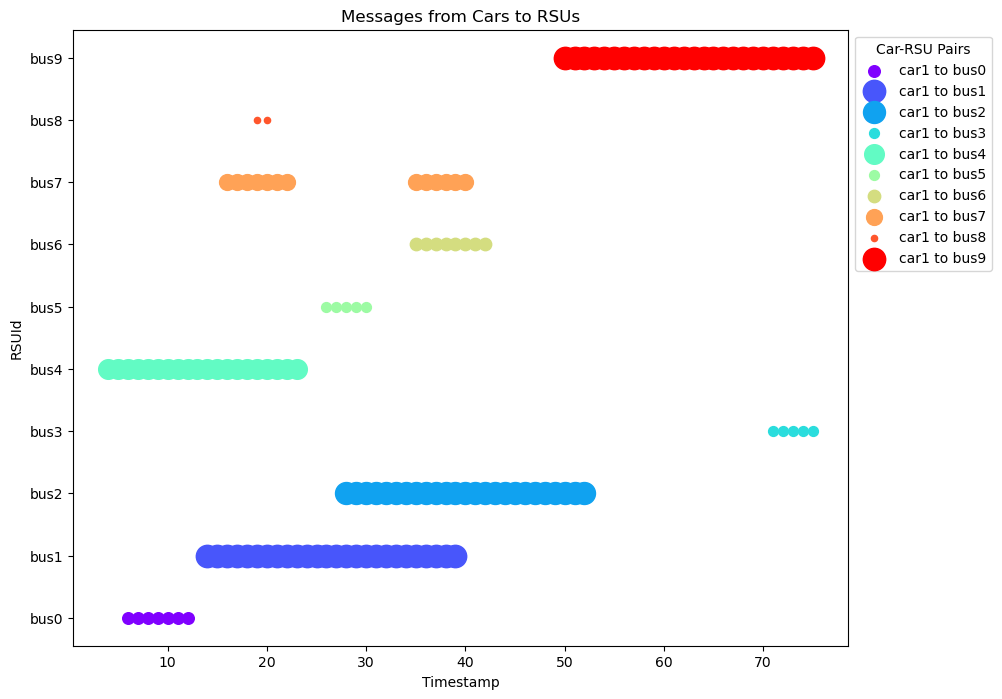

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Create a color map to assign a unique color to each car-RSU pair
colors = cm.rainbow(np.linspace(0, 1, len(df)))

plt.figure(figsize=(10, 8))

for color, (_, row) in zip(colors, df.iterrows()):
    carId = row['CarId']
    rsuId = row['RSUId']
    timestamps = row['Timestamps']
    messageCount = row['MessageCount']

    # Create a scatter plot with one point for each timestamp
    plt.scatter(timestamps, [rsuId]*len(timestamps), s=messageCount*10, color=color, label=f'{carId} to {rsuId}')
    
plt.title('Messages from Cars to RSUs')
plt.xlabel('Timestamp')
plt.ylabel('RSUId')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Car-RSU Pairs')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Create a color map to assign a unique color to each car-RSU pair
colors = cm.rainbow(np.linspace(0, 1, len(df)))

plt.figure(figsize=(10, 8))

for color, (_, row) in zip(colors, df.iterrows()):
    carId = row['CarId']
    rsuId = row['RSUId']
    timestamps = row['Timestamps']
    messageCount = row['MessageCount']

    # Create a scatter plot with one point for each timestamp
    plt.scatter(timestamps, [rsuId]*len(timestamps), s=messageCount*10, color=color, label=f'{carId} to {rsuId}')

# Add vertical dotted line every 1 second
max_time = max([max(row['Timestamps']) for _, row in df.iterrows()])
for i in range(int(max_time)+1):
    plt.axvline(x=i, linestyle='dotted', color='grey')    
    
plt.title('Messages from Cars to RSUs')
plt.xlabel('Timestamp')
plt.ylabel('RSUId')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Car-RSU Pairs')
plt.show()
